# Lab 5: Organizing document collections

## Load 20 Newsgroup dataset.
You can find more information at http://qwone.com/~jason/20Newsgroups/

Thee scikit-learn library already provides access to the 20 Newsgroups dataset.

In [1]:
from sklearn.datasets import fetch_20newsgroups
collection = fetch_20newsgroups(categories=['talk.politics.guns','sci.med','comp.graphics'])

In [2]:
# Checking dataset shape.
print('Dataset length = {}.'.format(len(collection.data)))

Dataset length = 1724.


In [3]:
# True labels:
true_labels = collection.target
#print(true_labels.tolist())
print(true_labels)

[1 0 2 ... 2 1 1]


The actual data is in text format. You need to transform it into numeric weight vectors using for instance the term frequency or TF-IDF vector space model). As we saw in earlier labs, the scikit-learn library provides methods for this:

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf = False)
vectorspace = vectorizer.fit_transform(collection.data)

## 1. Clustering the 20 NewsGroup collection
Clustering of documents can be also achieved using scikit-learn library.

### 1.1. Extract the vector space of the 20 Newsgroup, and cluster the collection using agglomerative clustering available from scikit-learn.
Note: The ’collection.data’ instruction removed the class variable.

See: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

Parameterize the clustering search to use cosine as the distance function.

In [5]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 3
model = AgglomerativeClustering(n_clusters = n_clusters,
                                linkage = 'complete',
                                affinity = 'manhattan',
                                distance_threshold = None)

model = model.fit(vectorspace.toarray())
print(model.labels_)

[0 0 0 ... 0 0 0]


### 1.2. Plot the learned dendogram.

The dendrogram illustrates how each cluster is composed by drawing a U-shaped link between a non-singleton cluster and its children. The top of the U-link indicates a cluster merge. The two legs of the U-link indicate which clusters were merged. The length of the two legs of the U-link represents the distance between the child clusters. 

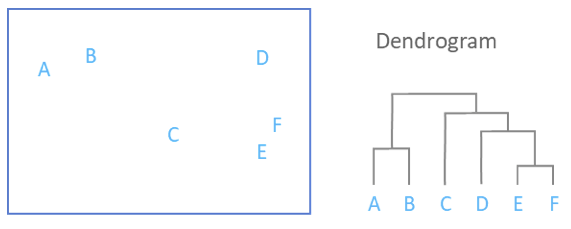

See: 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

This example plots the corresponding dendrogram of a hierarchical clustering using AgglomerativeClustering and the dendrogram method available in scipy.

In [6]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

#### Compare the clustering solutions produced under single and complete linkage criteria.

Note:

`Z` - The linkage matrix encoding the hierarchical clustering to render as a dendrogram.

`truncate_mode`: `'level'` - No more than `p` levels of the dendrogram tree are displayed. A “level” includes all nodes with "p" merges from the last merge.

`color_threshold`: `double, optional` - For brevity, let `t` be the color_threshold. Colors all the descendent links below a cluster node `k` the same color if `k` is the first node below the cut threshold `t`. [...] If color_threshold is None or ‘default’, corresponding with MATLAB(TM) behavior, the threshold is set to `0.7*max(Z[:,2])`.


1.2.1. Single linkage criteria.

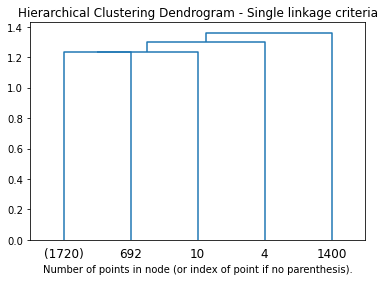

In [7]:
# setting distance_threshold=0 ensures we compute the full tree.
model2 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single')
model2 = model2.fit(vectorspace.toarray())

# plot the top three levels of the dendrogram
plt.title('Hierarchical Clustering Dendrogram - Single linkage criteria')
plot_dendrogram(model2, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

1.2.2. Complete linkage criteria.

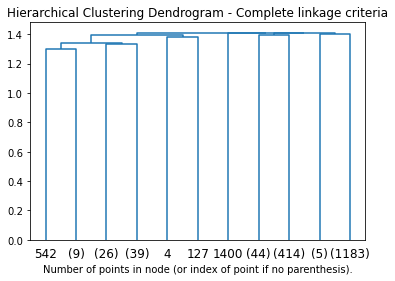

In [8]:
# setting distance_threshold=0 ensures we compute the full tree.
model2 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')
model2 = model2.fit(vectorspace.toarray())

# plot the top three levels of the dendrogram
plt.title('Hierarchical Clustering Dendrogram - Complete linkage criteria')
plot_dendrogram(model2, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### 1.3. Evaluate the clustering solution by computing an internal measure (e.g. silhouette) and an external measure (e.g. adjusted rand index) for the produced clustering solution.

#### Silhouette Coefficient of all samples.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (`a`) and the mean nearest-cluster distance (`b`) for each sample. The Silhouette Coefficient for a sample is `(b - a) / max(a, b)`. To clarify, `b` is the distance between a sample and the nearest cluster that the sample is not a part of. 

Note: Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

See: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [9]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(vectorspace, model.labels_, metric = 'cosine')
print('silhouette score = {}'.format(sil_score))

silhouette score = 0.0912657717500529


#### Rand index adjusted for chance.

The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

See: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

In [10]:
from sklearn.metrics.cluster import adjusted_rand_score
ar_score = adjusted_rand_score(model.labels_, collection.target)
print('adjusted rand score = {}'.format(ar_score))

adjusted rand score score = 4.143436579583183e-05
